# Mobile Robotics - Mapping
### local coordinate system to global coordinate system

When facing the challenge to map an environment, a mobile robot must navigate and acquire data from its sensors to be able to reconstruct some aspects of the area. Our goal is to create a global map from sensor readings acquired while navigating, in a local coordinate system (relative to the robot's perspective).

The following code is an example on how to translate such coordinates in order to incorporate all local measurements in one global map.

In [1]:
import numpy as np

# measurements = [101, 101, 101, 101, 102, 107, 107,
#                108, 108, 108, 108, 108, 108, 109, 
#                109, 109, 109, 110, 110, 110, 111,
#                255, 255, 255, 255, 44, 43, 43, 42,
#                42, 41, 41, 41, 41, 40, 40, 40, 40,
#                40, 40, 40, 40, 40, 39, 39, 39, 39,
#                39, 39, 39, 39, 39, 39, 39, 40, 40,
#                40, 40, 40, 40, 40, 40, 40, 41, 41,
#                41, 41, 42, 42, 42, 42, 43, 43, 43,
#                43, 44, 44, 44, 45, 46, 47, 255, 255,
#                55, 255, 255, 255, 255, 255, 255, 255]
measurements = []
for i in range(91):
    if ((i * 2) / 60.0 < 2) and ((i * 2) / 60.0 > 1):
        measurements.append(30)
    else:
        measurements.append(255)

for angle, dist in enumerate(measurements):
    '''
    After this loop 'measurements' will be a list of tuples
    with Cartesian coordinates
    '''
    x = np.cos(np.radians(angle * 2)) * dist
    y = np.sin(np.radians(angle * 2)) * dist
    measurements[angle] = (x, y)

'''
Measurements has now local coordinates related to a
fullScan command.
Local coordinate system = robot coordinate system

Nota mental: passar isso para o Jupyter notebook para
plotar os mapas
'''

'\nMeasurements has now local coordinates related to a\nfullScan command.\nLocal coordinate system = robot coordinate system\n\nNota mental: passar isso para o Jupyter notebook para\nplotar os mapas\n'

In [2]:
rx = 30 # robot position in global reference frame
ry = 0 # robot position in global reference frame

rotation = 0

measurements_global_0 = []
for ang, coord in enumerate(measurements):
    gx = np.cos(np.radians(rotation)) * coord[0] - np.sin(np.radians(rotation)) * coord[1] + rx
    gy = np.sin(np.radians(rotation)) * coord[0] + np.cos(np.radians(rotation)) * coord[1] + ry
    measurements_global_0.append((gx, gy))

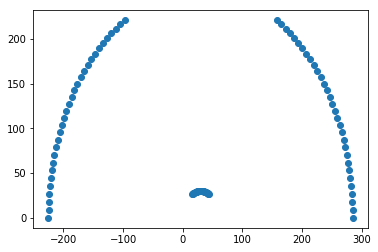

In [3]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*measurements_global_0))
plt.show()

In [4]:
rx = 50 # robot position in global reference frame
ry = 60 # robot position in global reference frame

rotation = 90

measurements_global_30 = []
for ang, coord in enumerate(measurements):
    gx = np.cos(np.radians(rotation)) * coord[0] - np.sin(np.radians(rotation)) * coord[1] + rx
    gy = np.sin(np.radians(rotation)) * coord[0] + np.cos(np.radians(rotation)) * coord[1] + ry
    measurements_global_30.append((gx, gy))

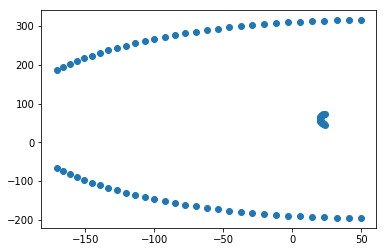

In [5]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*measurements_global_30))
plt.show()

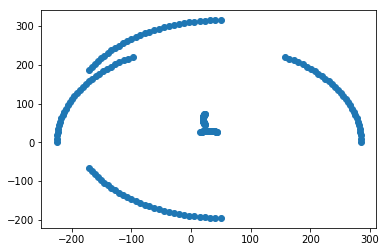

In [6]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*(measurements_global_30+measurements_global_0)))
plt.show()

In [7]:
rx = 10 # robot position in global reference frame
ry = 60 # robot position in global reference frame

rotation = -90

measurements_global_90 = []
for ang, coord in enumerate(measurements):
    gx = np.cos(np.radians(rotation)) * coord[0] - np.sin(np.radians(rotation)) * coord[1] + rx
    gy = np.sin(np.radians(rotation)) * coord[0] + np.cos(np.radians(rotation)) * coord[1] + ry
    measurements_global_90.append((gx, gy))

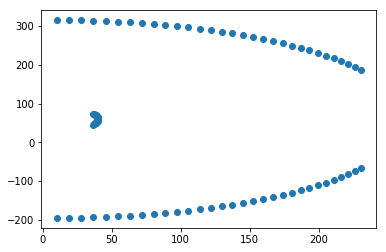

In [8]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*measurements_global_90))
plt.show()

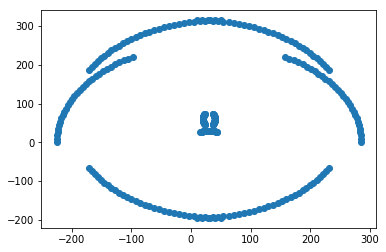

In [9]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*(measurements_global_30+measurements_global_0+measurements_global_90)))
plt.show()

In [10]:
rx = 30 # robot position in global reference frame
ry = 120 # robot position in global reference frame

rotation = -180 # or +180, it does not make any difference 

measurements_global_180 = []
for ang, coord in enumerate(measurements):
    gx = np.cos(np.radians(rotation)) * coord[0] - np.sin(np.radians(rotation)) * coord[1] + rx
    gy = np.sin(np.radians(rotation)) * coord[0] + np.cos(np.radians(rotation)) * coord[1] + ry
    measurements_global_180.append((gx, gy))

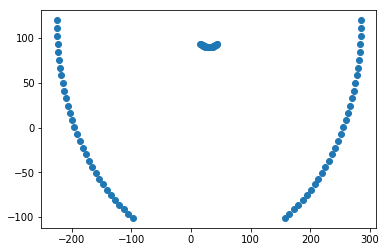

In [11]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*measurements_global_180))
plt.show()

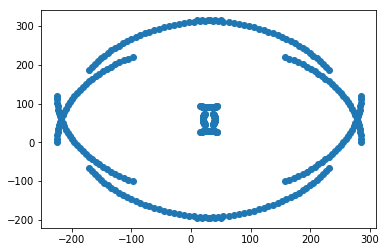

In [12]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*(measurements_global_30+measurements_global_0+measurements_global_90+measurements_global_180)))
plt.show()